In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-12-16 / Aki Taanila


# Yksinkertainen eksponentiaalinen tasoitus

Aikasarjaennustamisessa oletan että toteutuneiden havaintojen muodostama aikasarja sisältää informaatiota, joka auttaa tulevien havaintojen ennustamisessa. 

Eksponentiaalisen tasoituksen mallit ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä. Ennustusmenetelmä riippuu siitä, minkälaista systemaattista vaihtelua aikasarjassa esiintyy. Eksponentiaalisia tasoitusmenetelmiä käytettäessä on kolme päävaihtoehtoa:
* **Yksinkertainen eksponentiaalinen tasoitus** aikasarjoille, joissa ei ole trendiä eikä kausivaihtelua. Jos ennustetaan pidemmälle kuin seuraavaan aikaleimaan, niin yksinkertainen eksoponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
* **Kaksinkertainen eksponentiaalinen tasoitus** eli **Holt**in menetelmä aikasarjoille, joissa on trendi, mutta ei kausivaihtelua.
* **Kolminkertainen eksponentiaalinen tasoitus** eli **Holt-Winter**in menetelmä aikasarjoille, joissa on sekä trendi että kausivaihtelu.

Tässä muistiossa käytetään yksinkertaista eksponentiaalista tasoitusta. Yksinkertaisessa eksponentiaalisessa tasoituksessa ennuste lasketaan seuraavasti:

<b>    alfa*edellinen havainto + (1 - alfa)*edellinen ennuste</b>

Ennuste saadaan viimeisimmän havainnon ja siihen liittyneen ennusteen painotettuna summana. Painokerroin **alfa** on välillä 0 - 1 oleva luku, joka ilmaisee, kuinka suurella painolla edellistä havaintoa painotetaan ennustetta laskettaessa:

* Jos alfa on 0, niin ennuste on sama kuin edellinen ennuste.
* Jos alfa on 1, niin ennuste on sama kuin edellinen havainto.
* Suuret alfan arvot antavat ennusteita, jotka reagoivat herkästi aikasarjassa esiintyvään vaihteluun, koska viimeisimmillä havainnoilla on suuri paino.
* Pienet alfan arvot tasoittavat voimakkaasti aikasarjan vaihtelua.

Alfan arvo valitaan yleensä siten että ennustevirheiden neliöiden summa saadaan mahdollisimman pieneksi. Voin kirjoittaa ennusteen laskentakaavan myös muotoon:

<b>    edellinen ennuste + alfa*(edellinen havainto – edellinen ennuste)</b>

Ennustetta siis korjataan jokaisen toteutuneen havainnon jälkeen korjaustermillä <b>alfa*edellisen ennusteen virhe</b>.

Huomaa, että seuraavassa esimerkissä yksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä trendi ja kausivaihtelu, jotka malli jättää huomiotta!

Trendin huomioivan mallin löydät muistiosta https://nbviewer.org/github/taanila/aikasarjat/blob/main/forecast2.ipynb

Trendin ja kausivaihtelun huomioivan mallin löydät muistiosta https://nbviewer.org/github/taanila/aikasarjat/blob/main/forecast3.ipynb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing

sns.set_style('whitegrid')

## Aikasarjaan tutustuminen

In [3]:
df = pd.read_excel('http://taanila.fi/aikasarja.xlsx')
df.head()

,Vuosineljännes,Kysyntä
0,2013-12-31,500
1,2014-03-31,350
2,2014-06-30,250
3,2014-09-30,400
4,2014-12-31,450


In [4]:
# Aikaleimat indeksiin
# to_datetime muuntaa merkkijonomuotoisen tiedon aikaleimoiksi
# format mahdollistaa erilaisten esitysmuotojen tunnistamisen aikaleimoiksi
df.index = pd.to_datetime(df['Vuosineljännes'], format="%Y-%m-%d")

# Pudotetaan tarpeettomaksi käynyt sarake pois ja katsotaan aikasarja
df = df.drop('Vuosineljännes', axis=1)
df

,Kysyntä
Vuosineljännes,
2013-12-31,500
2014-03-31,350
2014-06-30,250
2014-09-30,400
2014-12-31,450
2015-03-31,350
2015-06-30,200
2015-09-30,300
2015-12-31,350


<Axes: xlabel='Vuosineljännes'>

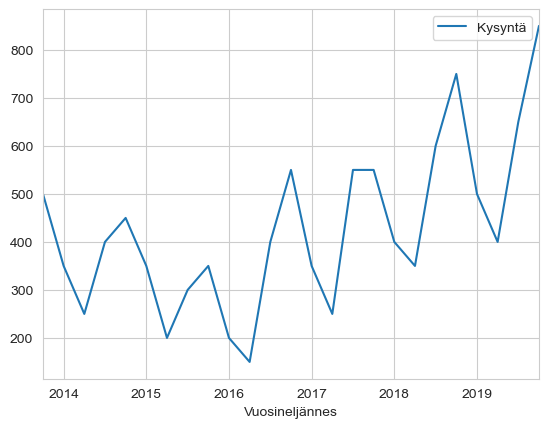

In [5]:
df.plot()

## Mallin sovitus

Ennustemalli sovitetaan (**fit**) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi **malli**), joka sisältää monenlaista tietoa mallista.

**freq**-parametrille käytän arvoa **'Q'**, koska kyseessä ovat vuosineljänneksien viimeiset päivät. Lisätietoa **freq**-parametrin muista mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [6]:
malli = ExponentialSmoothing(df['Kysyntä'], freq='Q').fit()

In [7]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Ennuste'] = malli.fittedvalues
df

,Kysyntä,Ennuste
Vuosineljännes,,
2013-12-31,500,388.105892
2014-03-31,350,424.219676
2014-06-30,250,400.265302
2014-09-30,400,351.767228
2014-12-31,450,367.334338
2015-03-31,350,394.014652
2015-06-30,200,379.808938
2015-09-30,300,321.775666
2015-12-31,350,314.747578


<Axes: xlabel='Vuosineljännes'>

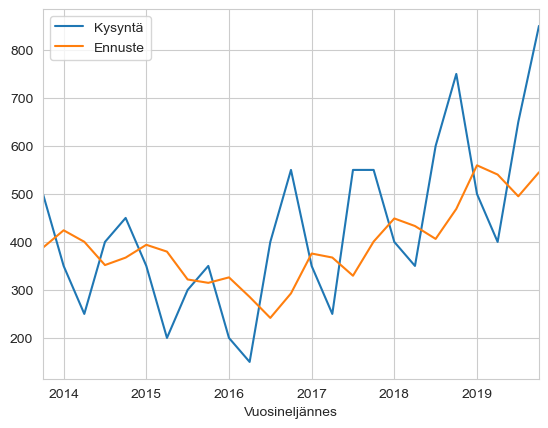

In [8]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [9]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Kysyntä,Ennuste,Ennustevirhe
Vuosineljännes,,,
2013-12-31,500,388.105892,111.894108
2014-03-31,350,424.219676,-74.219676
2014-06-30,250,400.265302,-150.265302
2014-09-30,400,351.767228,48.232772
2014-12-31,450,367.334338,82.665662
2015-03-31,350,394.014652,-44.014652
2015-06-30,200,379.808938,-179.808938
2015-09-30,300,321.775666,-21.775666
2015-12-31,350,314.747578,35.252422


## Mallin tarkastelu

Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän

* ennustevirheiden aikasarjaa viivakaaviona
* ennusteiden ja toteutuneiden arvojen hajontakaaviota
* malliin liittyvää statistiikkaa, jonka saan **summary**-funktiolla.

Huomaa erityisesti **SSE** (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.

Text(0, 0.5, 'Ennustevirhe')

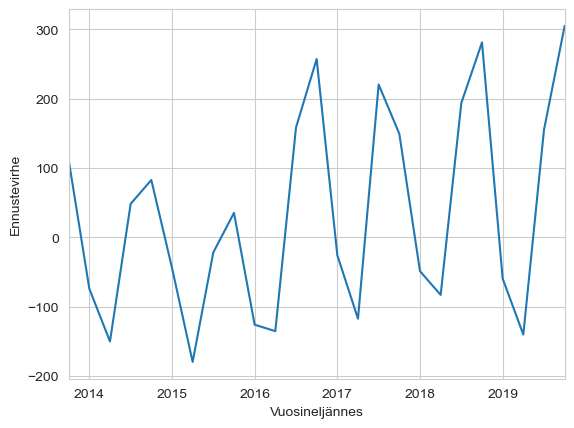

In [10]:
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

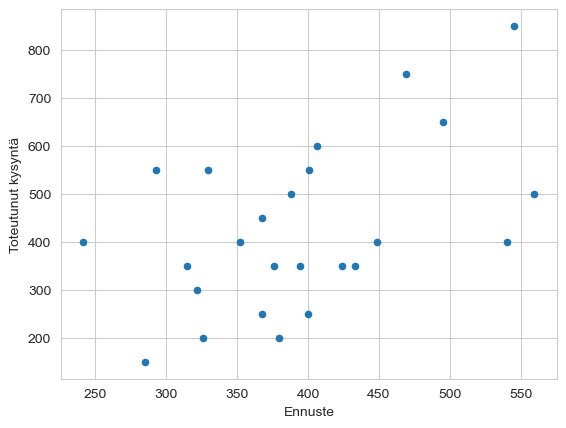

In [11]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
df.plot(kind='scatter', x='Ennuste', y='Kysyntä')
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [12]:
# Mallin statistiikkaa
malli.summary()

Dep. Variable:,Kysyntä,No. Observations:,25
Model:,ExponentialSmoothing,SSE,562690.236
Optimized:,True,AIC,254.540
Trend:,None,BIC,256.978
Seasonal:,None,AICC,256.540
Seasonal Periods:,None,Date:,"Sat, 16 Dec 2023"
Box-Cox:,False,Time:,19:54:42
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3227497,alpha,True
initial_level,388.10589,l.0,True


## Ennusteiden laskeminen

Ennustettavien ajankohtien aikaleimojen määrittämiseksi:

* Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
* Ennustettavien ajankohtien lukumäärän voin määrittää **periods**-parametrilla.
* Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty **freq**-parametrin arvo.
        
Lisätietoa **freq**-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [13]:
#Tarkistan viimeisen aikaleiman
df.tail()

,Kysyntä,Ennuste,Ennustevirhe
Vuosineljännes,,,
2018-12-31,750,468.808566,281.191434
2019-03-31,500,559.563003,-59.563003
2019-06-30,400,540.339064,-140.339064
2019-09-30,650,495.044680,154.955320
2019-12-31,850,545.056456,304.943544


In [14]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2020-03-31', periods=8, freq='Q')

# Ennusteet kahdeksalle vuosineljännekselle
ennusteet = malli.forecast(8)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data=ennusteet, index=index, columns=['Ennuste'])
df_ennuste

,Ennuste
2020-03-31,643.476878
2020-06-30,643.476878
2020-09-30,643.476878
2020-12-31,643.476878
2021-03-31,643.476878
2021-06-30,643.476878
2021-09-30,643.476878
2021-12-31,643.476878


<Axes: xlabel='Vuosineljännes'>

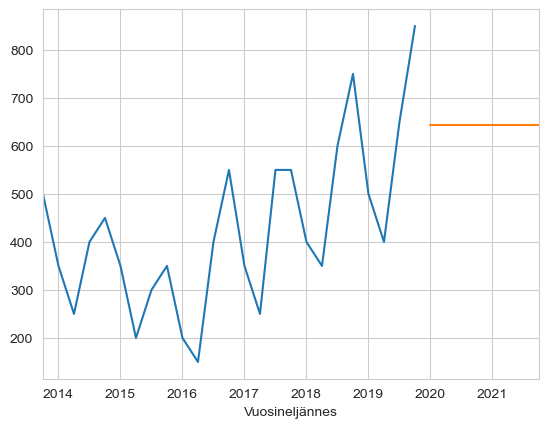

In [15]:
# Viivakaavio havainnoista
df['Kysyntä'].plot()

# Ennusteet kaavioon; huomaa, että yksinkertainen eksponentiaalinen tasoitus tuottaa vakioennusteen (suora viiva)
df_ennuste['Ennuste'].plot()

## Lisätietoa

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/